STOCK MARKET PREDICTION USING THE LONG SHORT TERM MEMORY(LSTM) MODEL.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

2024-03-13 02:06:41.448329: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import yfinance as yf

# Load historical data
stock_data = yf.download('AAPL', start='2010-01-01', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [7]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

In [8]:
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
65/65 [==============================] - 4s 23ms/step - loss: 8.4854e-04
Epoch 2/100
65/65 [==============================] - 2s 23ms/step - loss: 3.0481e-05
Epoch 3/100
65/65 [==============================] - 1s 23ms/step - loss: 2.9077e-05
Epoch 4/100
65/65 [==============================] - 1s 23ms/step - loss: 2.8329e-05
Epoch 5/100
65/65 [==============================] - 1s 23ms/step - loss: 2.8672e-05
Epoch 6/100
65/65 [==============================] - 2s 24ms/step - loss: 2.8707e-05
Epoch 7/100
65/65 [==============================] - 2s 23ms/step - loss: 2.7302e-05
Epoch 8/100
65/65 [==============================] - 1s 23ms/step - loss: 2.6897e-05
Epoch 9/100
65/65 [==============================] - 1s 23ms/step - loss: 2.8765e-05
Epoch 10/100
65/65 [==============================] - 1s 23ms/step - loss: 3.0991e-05
Epoch 11/100
65/65 [==============================] - 1s 22ms/step - loss: 2.4843e-05
Epoch 12/100
65/65 [==============================] - 1s 22ms/s

In [11]:
predictions = model.predict(X_test)

28/28 [==============================] - 1s 7ms/step


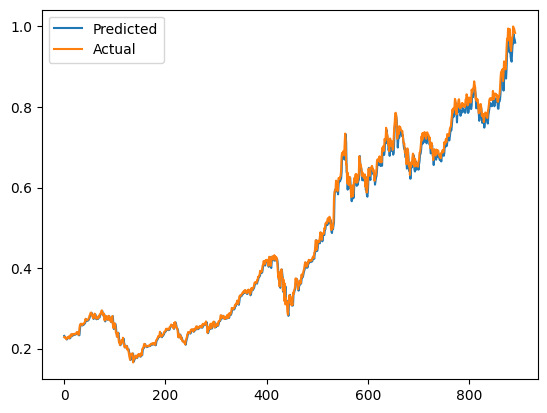

In [12]:
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()